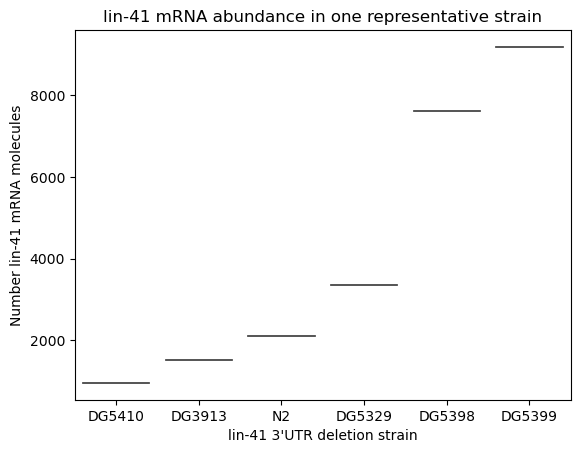

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dictionary with the given data
data = {
    'image_id': ['DG5410', 'DG3913', 'N2', 'DG5329', 'DG5398', 'DG5399'],
    'number_spots_set-3': [1392, 1188, 1105, 463, 1484, 3701],
    'number_spots_lin-41': [962, 1533, 2117, 3353, 7608, 9176]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
#print(df)

sns.violinplot(x="image_id", y="number_spots_lin-41", data=data)
plt.ylabel("Number lin-41 mRNA molecules")  # Edit the x-axis label
plt.xlabel("lin-41 3'UTR deletion strain")  # Edit the y-axis label
plt.title("lin-41 mRNA abundance in one representative strain")

plt.show()

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dictionary with the given data
data = {
    'image_id': ['DG5410', 'DG3913', 'N2', 'DG5329', 'DG5398', 'DG5399'],
    'number_spots_set-3': [1392, 1188, 1105, 463, 1484, 3701],
    'number_spots_lin-41': [962, 1533, 2117, 3353, 7608, 9176]
}


# import data as csv

data = {
    'DG5410': '', 
    'DG3913': '',
    'N2': '' , 
    'DG5329': '', 
    'DG5398': '', 
    'DG5399': '',
    'DG5779': ''
    
    
    
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
#print(df)

sns.violinplot(x="image_id", y="number_spots_lin-41", data=data)
plt.ylabel("Number lin-41 mRNA molecules")  # Edit the x-axis label
plt.xlabel("lin-41 3'UTR deletion strain")  # Edit the y-axis label
plt.title("lin-41 mRNA abundance in one representative strain")

plt.show()

ValueError: If using all scalar values, you must pass an index

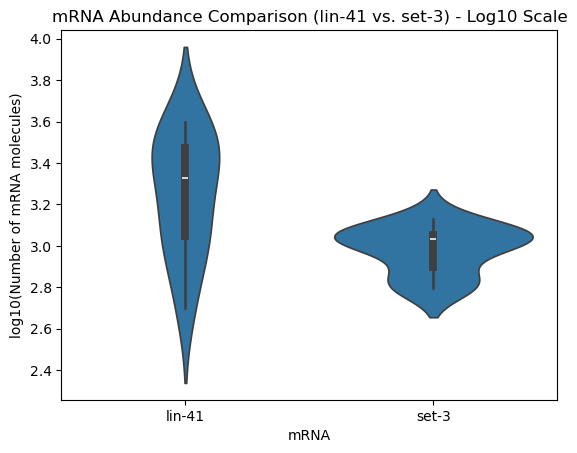

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a dictionary with the given data
lin41 = [3008, 828, 1517, 2945, 1176, 2529, 499, 1068, 3595, 2130, 3984]
set3 = [1348, 890, 1095, 636, 1076, 1045, 707, 1177, 1142, 1118, 627]

# Apply a base-10 log transformation (log10) to the data
lin41_log = [np.log10(x) for x in lin41]
set3_log = [np.log10(x) for x in set3]

data = {
    'mRNA': ['lin-41'] * len(lin41) + ['set-3'] * len(set3),
    'log10_number_spots': lin41_log + set3_log
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a violin plot with a log10-scaled y-axis
sns.violinplot(x="mRNA", y="log10_number_spots", data=df)
plt.ylabel("log10(Number of mRNA molecules)")
plt.title("mRNA Abundance Comparison (lin-41 vs. set-3) - Log10 Scale")

# Display the plot
plt.show()



P-value for t-test: 0.2784894374849952
P-value is not less than 0.05: Not statistically significant (p >= 0.05)


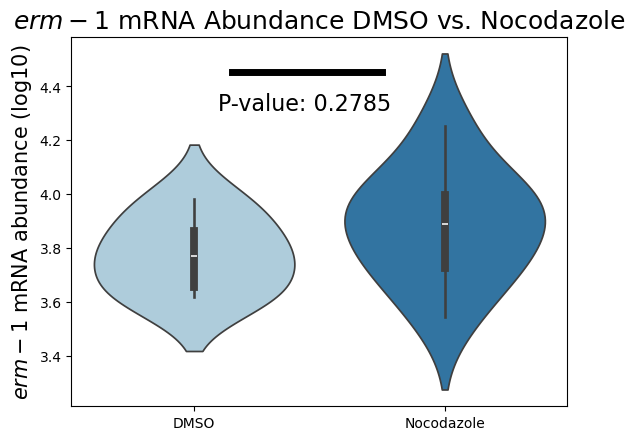

P-value: 0.2785 is not statistically significant (p >= 0.05)


In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Corrected data representation
DMSO_mCherry = [4168, 4189, 6034, 5732, 7750, 9607]
noco_mCherry = [5345, 11175, 17880, 3512, 7769, 9216, 9932, 6910, 5211]

# Apply a base-10 log transformation (log10) to the data
DMSO_mCherry_log = [np.log10(x) for x in DMSO_mCherry]
noco_mCherry_log = [np.log10(x) for x in noco_mCherry]

# Create a DataFrame
data = {
    'Fluorophore': ['mCherry'] * len(DMSO_mCherry) + ['mCherry'] * len(noco_mCherry),
    'Condition': ['DMSO'] * len(DMSO_mCherry) + ['Nocodazole'] * len(noco_mCherry),
    'Abundance': DMSO_mCherry_log + noco_mCherry_log
}

df = pd.DataFrame(data)

# Perform t-test
DMSO_abundance = df[df['Condition'] == 'DMSO']['Abundance']
Nocodazole_abundance = df[df['Condition'] == 'Nocodazole']['Abundance']
t_stat, p_value = ttest_ind(DMSO_abundance, Nocodazole_abundance)

# Display the p-value
print(f"P-value for t-test: {p_value}")
p_value = 0.2784894374849952
threshold = 0.05

if p_value < threshold:
    print(f"P-value is less than {threshold}: Statistical significance (p < {threshold})")
else:
    print(f"P-value is not less than {threshold}: Not statistically significant (p >= {threshold})")


# Create a violin plot with a log10-scaled y-axis and hue for condition
sns.violinplot(x="Condition", y="Abundance", hue="Condition", data=df, palette = {"DMSO": sns.color_palette("Paired")[0], "Nocodazole": sns.color_palette("Paired")[1]}, split=False)
# plt.text(0.15, 0.75, f"P-value: {p_value:.4f}", fontsize=14, ha='right', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.xlabel("")
plt.ylabel("$\it{erm-1}$ mRNA abundance (log10)", fontsize = 15)
plt.title(r"$\it{erm-1}$ mRNA Abundance DMSO vs. Nocodazole", fontsize=18)

# Add a line above the violins
plt.plot([0.15, 0.75], [np.max(df['Abundance']) + 0.2, np.max(df['Abundance']) + 0.2], color='black', linestyle='-', linewidth=5)
# Add p-value as text on top of the plot
plt.text(0.47, 0.80, f"P-value: {p_value:.4f}", transform=plt.gca().transAxes, fontsize=16, ha='center')

# Display the plot
plt.show()



In [79]:
p_value = 0.2784894374849952

if p_value < 0.001:
    print(f"P-value: {p_value:.4f} is highly statistically significant (p < 0.001)")
elif p_value < 0.01:
    print(f"P-value: {p_value:.4f} is statistically significant (p < 0.01)")
elif p_value < 0.05:
    print(f"P-value: {p_value:.4f} is marginally significant (p < 0.05)")
else:
    print(f"P-value: {p_value:.4f} is not statistically significant (p >= 0.05)")


P-value: 0.2785 is not statistically significant (p >= 0.05)


In [ ]:
#Rdigeline plots
print(spots_x.shape)
print(spots_y.shape)

# # Scatter plot for spots_x and spots_y
# spots_x = spots_post_clustering_ch1[:, 2]
# spots_y = spots_post_clustering_ch1[:, 1]

import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
import numpy as np
np.random.seed(0)
data = np.random.randn(100, 6)

# Creating ridgeline plot
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
ridgeline = sns.kdeplot(data=data, cmap="inferno", fill=True, linewidth=2)

# Adding labels and title
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Ridgeline Plot")

# Show the plot
plt.show()




import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Create ridgeline plot
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
sns.kdeplot(x=spots_x, fill=True, linewidth=2)

# Add labels and title
plt.xlabel("Normalized Image Width")
plt.ylabel("Density")
plt.title("Ridgeline Plot of Points along Image Width")

# Show the plot
plt.show()

